In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [2]:
from sklearn.linear_model import LinearRegression

##### Dữ liệu lấy từ Investing.com và bls.gov

In [544]:
df1 = pd.read_csv("giavang.csv")
df2 = pd.read_csv("giadau.csv")
df3 = pd.read_csv("KLgiaodich.csv")
df4 = pd.read_csv("lamphat.csv")
df5 = pd.read_csv("usd.csv")

In [505]:
df3columns_to_drop = ["Mở", "Cao", "Thấp", "Lần cuối","% Thay đổi"]
df3 = df3.drop(columns=df3columns_to_drop ,axis=1)
# df3["Ngày"] = pd.to_datetime(df3["Ngày"],format='%d/%m/%Y')
df3['KL'] = df3['KL'].str.replace('K', '').astype(float) * 1000
# Nếu KL bằng NaN thì xóa cả dòng
for i in range (0,len(df3["KL"])):
    if (np.isnan(df3["KL"][i])==True):
        df3.drop(i, inplace=True)
df3 = df3.reset_index(drop=True)
df3

,Ngày,KL
0,01/04/2024,220770.0
1,28/03/2024,250250.0
2,27/03/2024,191460.0
3,26/03/2024,1590.0
4,25/03/2024,960.0
...,...,...
523,07/03/2022,372190.0
524,04/03/2022,241530.0
525,03/03/2022,180210.0
526,02/03/2022,227980.0


In [506]:
df4["Tháng"] = pd.to_datetime(df4["Tháng"],format='%d/%m/%Y')
df4

,Tháng,% Lạm phát
0,2024-03-01,3.5
1,2024-02-01,3.2
2,2024-01-01,3.1
3,2023-12-01,3.4
4,2023-11-01,3.1
5,2023-10-01,3.2
6,2023-09-01,3.7
7,2023-08-01,3.7
8,2023-07-01,3.2
9,2023-06-01,3.0


In [507]:
df1columns_to_drop = ["Mở", "Cao", "Thấp","KL"]
df1 = df1.drop(columns=df1columns_to_drop ,axis=1)
df1

,Ngày,Lần cuối,% Thay đổi
0,01/04/2024,"2,250.36",0.81%
1,28/03/2024,"2,232.38",1.75%
2,27/03/2024,"2,194.02",0.71%
3,26/03/2024,"2,178.58",0.33%
4,25/03/2024,"2,171.45",0.34%
...,...,...,...
538,07/03/2022,"1,998.11",1.51%
539,04/03/2022,"1,968.45",1.72%
540,03/03/2022,"1,935.21",0.47%
541,02/03/2022,"1,926.11",-0.88%


### Kết hợp 2 dataset lại
   - Xóa đi các ngày không trùng nhau
   - Giữ lại bảng giá dầu cuối ngày và ghép 2 dataset
   - Chuyển các cột về đúng kiểu dữ liệu mong muốn

In [508]:
df1

,Ngày,Lần cuối,% Thay đổi
0,01/04/2024,"2,250.36",0.81%
1,28/03/2024,"2,232.38",1.75%
2,27/03/2024,"2,194.02",0.71%
3,26/03/2024,"2,178.58",0.33%
4,25/03/2024,"2,171.45",0.34%
...,...,...,...
538,07/03/2022,"1,998.11",1.51%
539,04/03/2022,"1,968.45",1.72%
540,03/03/2022,"1,935.21",0.47%
541,02/03/2022,"1,926.11",-0.88%


In [509]:
df3

,Ngày,KL
0,01/04/2024,220770.0
1,28/03/2024,250250.0
2,27/03/2024,191460.0
3,26/03/2024,1590.0
4,25/03/2024,960.0
...,...,...
523,07/03/2022,372190.0
524,04/03/2022,241530.0
525,03/03/2022,180210.0
526,02/03/2022,227980.0


In [510]:
for i in range(0,len(df1["Ngày"])):
    if ((df1["Ngày"][i] in df3["Ngày"].values)==False):
        df1.drop(i, inplace=True)
df1 = df1.reset_index(drop=True)

In [511]:
df1

,Ngày,Lần cuối,% Thay đổi
0,01/04/2024,"2,250.36",0.81%
1,28/03/2024,"2,232.38",1.75%
2,27/03/2024,"2,194.02",0.71%
3,26/03/2024,"2,178.58",0.33%
4,25/03/2024,"2,171.45",0.34%
...,...,...,...
523,07/03/2022,"1,998.11",1.51%
524,04/03/2022,"1,968.45",1.72%
525,03/03/2022,"1,935.21",0.47%
526,02/03/2022,"1,926.11",-0.88%


In [512]:
for i in range(0,len(df3["Ngày"])):
    if ((df3["Ngày"][i] in df1["Ngày"].values)==False):
        df3.drop(i, inplace=True)
df3 = df3.reset_index(drop=True)
df3

,Ngày,KL
0,01/04/2024,220770.0
1,28/03/2024,250250.0
2,27/03/2024,191460.0
3,26/03/2024,1590.0
4,25/03/2024,960.0
...,...,...
523,07/03/2022,372190.0
524,04/03/2022,241530.0
525,03/03/2022,180210.0
526,02/03/2022,227980.0


In [513]:
df3

,Ngày,KL
0,01/04/2024,220770.0
1,28/03/2024,250250.0
2,27/03/2024,191460.0
3,26/03/2024,1590.0
4,25/03/2024,960.0
...,...,...
523,07/03/2022,372190.0
524,04/03/2022,241530.0
525,03/03/2022,180210.0
526,02/03/2022,227980.0


In [514]:
df3.drop(columns=['Ngày'], inplace=True)
result_df13 = pd.concat([df1,df3], axis=1)
result_df13

,Ngày,Lần cuối,% Thay đổi,KL
0,01/04/2024,"2,250.36",0.81%,220770.0
1,28/03/2024,"2,232.38",1.75%,250250.0
2,27/03/2024,"2,194.02",0.71%,191460.0
3,26/03/2024,"2,178.58",0.33%,1590.0
4,25/03/2024,"2,171.45",0.34%,960.0
...,...,...,...,...
523,07/03/2022,"1,998.11",1.51%,372190.0
524,04/03/2022,"1,968.45",1.72%,241530.0
525,03/03/2022,"1,935.21",0.47%,180210.0
526,02/03/2022,"1,926.11",-0.88%,227980.0


In [515]:
result_df13["Ngày"] = pd.to_datetime(result_df13["Ngày"],format='%d/%m/%Y')
result_df13['% Thay đổi'] = result_df13['% Thay đổi'].str.replace('%', '').astype(float)
result_df13['Tăng giảm'] = 0
result_df13

,Ngày,Lần cuối,% Thay đổi,KL,Tăng giảm
0,2024-04-01,"2,250.36",0.81,220770.0,0
1,2024-03-28,"2,232.38",1.75,250250.0,0
2,2024-03-27,"2,194.02",0.71,191460.0,0
3,2024-03-26,"2,178.58",0.33,1590.0,0
4,2024-03-25,"2,171.45",0.34,960.0,0
...,...,...,...,...,...
523,2022-03-07,"1,998.11",1.51,372190.0,0
524,2022-03-04,"1,968.45",1.72,241530.0,0
525,2022-03-03,"1,935.21",0.47,180210.0,0
526,2022-03-02,"1,926.11",-0.88,227980.0,0


In [516]:
for i in range (0,len(result_df13["Tăng giảm"])-1):
    if (result_df13["% Thay đổi"][i] >= 0):
        result_df13["Tăng giảm"][i+1] = 1
result_df13['Tăng giảm'] = result_df13["Tăng giảm"].astype(float)
result_df13

C:\Users\ngduy\AppData\Local\Temp\ipykernel_17164\3725832595.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  result_df13["Tăng giảm"][i+1] = 1
C:\Users\ngduy\AppData\Local\Temp\ipykernel_17164\3725832595.py:3: SettingWithCopyWarning: 
A 

,Ngày,Lần cuối,% Thay đổi,KL,Tăng giảm
0,2024-04-01,"2,250.36",0.81,220770.0,0.0
1,2024-03-28,"2,232.38",1.75,250250.0,1.0
2,2024-03-27,"2,194.02",0.71,191460.0,1.0
3,2024-03-26,"2,178.58",0.33,1590.0,1.0
4,2024-03-25,"2,171.45",0.34,960.0,1.0
...,...,...,...,...,...
523,2022-03-07,"1,998.11",1.51,372190.0,1.0
524,2022-03-04,"1,968.45",1.72,241530.0,1.0
525,2022-03-03,"1,935.21",0.47,180210.0,1.0
526,2022-03-02,"1,926.11",-0.88,227980.0,1.0


In [517]:
df4

,Tháng,% Lạm phát
0,2024-03-01,3.5
1,2024-02-01,3.2
2,2024-01-01,3.1
3,2023-12-01,3.4
4,2023-11-01,3.1
5,2023-10-01,3.2
6,2023-09-01,3.7
7,2023-08-01,3.7
8,2023-07-01,3.2
9,2023-06-01,3.0


In [518]:
x = pd.DataFrame(
    {
        "2022" : [0] *13,
        "2023" : [0] *13,
        "2024" : [0] *13,
        
     }
)
x

,2022,2023,2024
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,0,0,0
9,0,0,0


In [519]:
thang = df4["Tháng"][2].month
nam   = str(df4["Tháng"][2].year)
print(thang,nam)

1 2024


In [520]:
for i in range(0,len(df4["Tháng"])):
    thang = df4["Tháng"][i].month
    nam   = str(df4["Tháng"][i].year)
    x.loc[thang, nam] = df4["% Lạm phát"][i]
x

C:\Users\ngduy\AppData\Local\Temp\ipykernel_17164\4067003898.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x.loc[thang, nam] = df4["% Lạm phát"][i]
C:\Users\ngduy\AppData\Local\Temp\ipykernel_17164\4067003898.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.4' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x.loc[thang, nam] = df4["% Lạm phát"][i]
C:\Users\ngduy\AppData\Local\Temp\ipykernel_17164\4067003898.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x.loc[thang, nam] = df4["% Lạm phát"][i]


,2022,2023,2024
0,0.0,0.0,0.0
1,0.0,6.4,3.1
2,0.0,6.0,3.2
3,8.5,5.0,3.5
4,8.3,4.9,0.0
5,8.6,4.0,0.0
6,9.1,3.0,0.0
7,8.5,3.2,0.0
8,8.3,3.7,0.0
9,8.2,3.7,0.0


In [547]:
result_df = result_df13.copy()
# Tạo một cột mới "Lạm phát" với giá trị mặc định là None
result_df['Lạm phát'] = None
for i in range(0,len(result_df["Lạm phát"])):
    thang = result_df["Ngày"][i].month
    nam = str(result_df["Ngày"][i].year)
    result_df["Lạm phát"][i] = x[nam][thang]

C:\Users\ngduy\AppData\Local\Temp\ipykernel_17164\1450652464.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  result_df["Lạm phát"][i] = x[nam][thang]
C:\Users\ngduy\AppData\Local\Temp\ipykernel_17164\1450652464.py:7: SettingWithCopyWarni

In [548]:
result_df

,Ngày,Lần cuối,% Thay đổi,KL,Tăng giảm,Lạm phát
0,2024-04-01,"2,250.36",0.81,220770.0,0.0,0.0
1,2024-03-28,"2,232.38",1.75,250250.0,1.0,3.5
2,2024-03-27,"2,194.02",0.71,191460.0,1.0,3.5
3,2024-03-26,"2,178.58",0.33,1590.0,1.0,3.5
4,2024-03-25,"2,171.45",0.34,960.0,1.0,3.5
...,...,...,...,...,...,...
523,2022-03-07,"1,998.11",1.51,372190.0,1.0,8.5
524,2022-03-04,"1,968.45",1.72,241530.0,1.0,8.5
525,2022-03-03,"1,935.21",0.47,180210.0,1.0,8.5
526,2022-03-02,"1,926.11",-0.88,227980.0,1.0,8.5


In [549]:
df2columns_to_drop = ["Mở", "Cao", "Thấp", "KL","% Thay đổi"]
df2 = df2.drop(columns=df2columns_to_drop ,axis=1)
df2["Ngày"] = pd.to_datetime(df2["Ngày"],format='%d/%m/%Y')
df2["Lần cuối"] = df2['Lần cuối'].astype(float)
df2

,Ngày,Lần cuối
0,2024-04-01,84.14
1,2024-03-31,83.45
2,2024-03-28,83.44
3,2024-03-27,82.05
4,2024-03-26,81.61
...,...,...
643,2022-03-02,112.22
644,2022-03-01,107.77
645,NaT,NaN
646,NaT,NaN


In [550]:
for i in range(0,len(result_df["Ngày"])):
    if ((result_df["Ngày"][i] in df2["Ngày"].values)==False):
        result_df.drop(i, inplace=True)
result_df = result_df.reset_index(drop=True)

In [551]:
for i in range(0,len(df2["Ngày"])):
    if ((df2["Ngày"][i] in result_df["Ngày"].values)==False):
        df2.drop(i, inplace=True)
df2 = df2.reset_index(drop=True)

In [552]:
df2.drop(columns=['Ngày'], inplace=True)
df2 = df2.rename(columns={"Lần cuối": "Giá dầu"})
result = pd.concat([result_df,df2], axis=1)
result

,Ngày,Lần cuối,% Thay đổi,KL,Tăng giảm,Lạm phát,Giá dầu
0,2024-04-01,"2,250.36",0.81,220770.0,0.0,0.0,84.14
1,2024-03-28,"2,232.38",1.75,250250.0,1.0,3.5,83.44
2,2024-03-27,"2,194.02",0.71,191460.0,1.0,3.5,82.05
3,2024-03-26,"2,178.58",0.33,1590.0,1.0,3.5,81.61
4,2024-03-25,"2,171.45",0.34,960.0,1.0,3.5,82.38
...,...,...,...,...,...,...,...
523,2022-03-07,"1,998.11",1.51,372190.0,1.0,8.5,122.09
524,2022-03-04,"1,968.45",1.72,241530.0,1.0,8.5,116.37
525,2022-03-03,"1,935.21",0.47,180210.0,1.0,8.5,110.52
526,2022-03-02,"1,926.11",-0.88,227980.0,1.0,8.5,112.22


In [546]:
df5columns_to_drop = ["Mở", "Cao", "Thấp", "KL","% Thay đổi"]
df5 = df5.drop(columns=df5columns_to_drop ,axis=1)
df5["Ngày"] = pd.to_datetime(df5["Ngày"],format='%d/%m/%Y')
df5["Lần cuối"] = df5['Lần cuối'].astype(float)
df5

,Ngày,Lần cuối
0,2024-04-01,105.00
1,2024-03-31,104.50
2,2024-03-29,104.49
3,2024-03-28,104.53
4,2024-03-27,104.43
...,...,...
542,2022-03-07,99.29
543,2022-03-04,98.65
544,2022-03-03,97.79
545,2022-03-02,97.39


In [553]:
for i in range(0,len(result["Ngày"])):
    if ((result["Ngày"][i] in df5["Ngày"].values)==False):
        result.drop(i, inplace=True)
result = result.reset_index(drop=True)

In [554]:
for i in range(0,len(df5["Ngày"])):
    if ((df5["Ngày"][i] in result["Ngày"].values)==False):
        df5.drop(i, inplace=True)
df5 = df5.reset_index(drop=True)

In [556]:
df5.drop(columns=['Ngày'], inplace=True)
df5 = df5.rename(columns={"Lần cuối": "USD"})
final_df = pd.concat([result,df5], axis=1)
final_df

,Ngày,Lần cuối,% Thay đổi,KL,Tăng giảm,Lạm phát,Giá dầu,USD
0,2024-04-01,"2,250.36",0.81,220770.0,0.0,0.0,84.14,105.00
1,2024-03-28,"2,232.38",1.75,250250.0,1.0,3.5,83.44,104.53
2,2024-03-27,"2,194.02",0.71,191460.0,1.0,3.5,82.05,104.43
3,2024-03-26,"2,178.58",0.33,1590.0,1.0,3.5,81.61,104.30
4,2024-03-25,"2,171.45",0.34,960.0,1.0,3.5,82.38,104.23
...,...,...,...,...,...,...,...,...
523,2022-03-07,"1,998.11",1.51,372190.0,1.0,8.5,122.09,99.29
524,2022-03-04,"1,968.45",1.72,241530.0,1.0,8.5,116.37,98.65
525,2022-03-03,"1,935.21",0.47,180210.0,1.0,8.5,110.52,97.79
526,2022-03-02,"1,926.11",-0.88,227980.0,1.0,8.5,112.22,97.39


##### HỒI QUY LOGISTIC

In [425]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [496]:
#cột Tăng giảm của dataframe result_df gồm các giá trị 0,1. Xây dựng mô hình hồi quy Logistic dựa vào các giá trị của cột KL và % Lạm phát để dự đoán giá trị Tăng giảm.
# Chuẩn bị dữ liệu
X = result_df[['KL', 'Lạm phát']]  # Features
y = result_df['Tăng giảm']  # Target variable

# Tạo DataFrame cho biến đầu vào và biến mục tiêu
X = result_df[['KL', 'Lạm phát']] # biến đầu vào
y = result_df['Tăng giảm'] # biến mục tiêu

# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50)

# Xây dựng mô hình hồi quy logistic
log_reg = LogisticRegression()

# Huấn luyện mô hình trên tập huấn luyện
log_reg.fit(X_train, y_train)

# Dự đoán giá trị trên tập kiểm thử
y_pred = log_reg.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.6037735849056604
              precision    recall  f1-score   support

         0.0       0.56      0.39      0.46        23
         1.0       0.62      0.77      0.69        30

    accuracy                           0.60        53
   macro avg       0.59      0.58      0.57        53
weighted avg       0.60      0.60      0.59        53


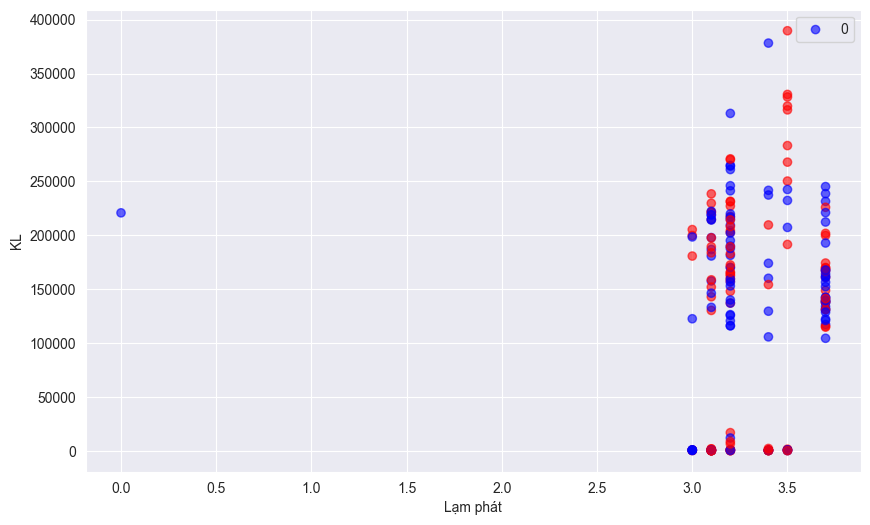

In [497]:
import matplotlib.pyplot as plt

# Tạo đồ thị
plt.figure(figsize=(10, 6))

# Vẽ các điểm màu đỏ (0) và xanh (1)
plt.scatter(result_df["Lạm phát"].head(200), result_df["KL"].head(200), c=result_df["Tăng giảm"].head(200), cmap='bwr', alpha=0.6)

# Đặt tên cho trục x và trục y
plt.xlabel("Lạm phát")
plt.ylabel("KL")

# Thêm chú thích cho các điểm
plt.legend(["0", "1"])

# Hiển thị đồ thị
plt.show()

In [498]:
def longest_sequence_of_ones(arr):
    max_length = 0
    start_index = None
    
    current_length = 0
    current_start_index = None
    
    for i, num in enumerate(arr):
        if num == 1:
            if current_length == 0:
                current_start_index = i
            current_length += 1
            
            if current_length > max_length:
                max_length = current_length
                start_index = current_start_index
        else:
            current_length = 0
            current_start_index = None
    
    return start_index

# Chia mảng ra thành các đoạn mỗi 60 phần tử và tính dãy con gồm các phần tử 1 liền nhau dài nhất
chunk_size = 60
start_indices = []
for i in range(0, len(result_df["Tăng giảm"]), chunk_size):
    chunk = result_df["Tăng giảm"][i:i+chunk_size]
    start_index = longest_sequence_of_ones(chunk)
    if start_index is not None:
        start_indices.append(i + start_index)

print("Index của chỉ số đầu tiên của dãy con:", start_indices)


Index của chỉ số đầu tiên của dãy con: [15, 64, 149, 180, 263, 310, 377, 469, 497]


In [499]:
# Ví dụ: In ra các hàng 0, 1, 2 của DataFrame
filter = (result_df.iloc[start_indices])
filter

,Ngày,Lần cuối,% Thay đổi,KL,Tăng giảm,Lạm phát
15,2024-03-08,"2,177.51",0.85,389680.0,1.0,3.5
64,2023-12-26,"2,067.20",0.60,290.0,1.0,3.4
149,2023-08-23,"1,914.31",0.91,170040.0,1.0,3.7
180,2023-07-11,"1,931.99",0.36,189370.0,1.0,3.2
263,2023-03-10,"1,867.83",2.02,345810.0,1.0,5.0
310,2023-01-03,"1,839.49",0.87,212270.0,1.0,6.4
377,2022-09-28,"1,659.44",1.88,279820.0,1.0,8.2
469,2022-05-23,"1,853.22",0.41,163270.0,1.0,8.6
497,2022-04-12,"1,966.59",0.67,172390.0,1.0,8.3


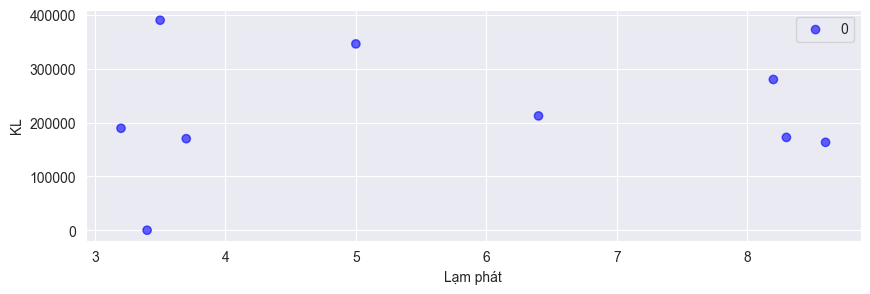

In [500]:
import matplotlib.pyplot as plt

# Tạo đồ thị
plt.figure(figsize=(10,3))

# Vẽ các điểm màu đỏ (0) và xanh (1) chỉ từ mảng filter
plt.scatter(filter["Lạm phát"], filter["KL"], c=filter["Tăng giảm"], cmap='bwr', alpha=0.6)

# Đặt tên cho trục x và trục y
plt.xlabel("Lạm phát")
plt.ylabel("KL")

# Thêm chú thích cho các điểm
plt.legend(["0", "1"])

# Hiển thị đồ thị
plt.show()


In [501]:
data = {
    'KL': [220770.0],
    'Lạm phát': [3.5],
}

# Tạo DataFrame từ dữ liệu
test = pd.DataFrame(data)
test

,KL,Lạm phát
0,220770.0,3.5


In [503]:
# Dự đoán kết quả trên dữ liệu kiểm tra
predictions = model.predict(test)

# In ra kết quả dự đoán
print(predictions)

[1.]
